# Text Preprocessing


In [166]:
#Import the important Libraries used in the Project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [167]:
#Let us Import the Book We would be taking under Consideration
Book = open(r"C:\Users\LENOVO\Downloads\The Monk Who Sold His Ferrari.txt",encoding = 'utf-8')

In [168]:
#Reading the content in the book and spliting it over list of lines
InitialReading = Book.read().splitlines()

In [169]:
print(InitialReading)

['', 'PRAISE FOR THE MONK WHO SOLD HIS FERRARI', '"The Monk Who Sold His Ferrari is a treasure — an elegant and', 'powerful formula for true success and happiness. Robin S. Sharma has', 'captured the wisdom of the ages and made it relevant for these turbulent', 'times. I couldn\'t put it down."', 'Joe Tye, author of Never Fear, Never Quit', '"A magnificent book. Robin S. Sharma is the next Og Mandino."', 'Dottie Walters, author of Speak and Grow Rich', '"Novel approach to self-help makes advice easy to take."', 'The Liberal', '"A wonderful story sharing lessons that can enrich your life."', 'Ken Vegotsky, author of The Ultimate Power', '"Filled with insights about following your passion and living your', 'dream. A good read!"', 'Justine and Michael Toms, cofounders of New Dimensions Radio and', 'coauthors of True Work: The Sacred Dimension of Earning a Living', '"Robin Sharma has created an enchanting tale that incorporates the', 'classic tools of transformation into a simple philosoph

In [170]:
#removing the empty lines from the list of the text
InitialReading = [i for i in InitialReading if i !='']

#joining the non-empty lines into one single string
Text =" "
Text = Text.join(InitialReading)

In [171]:
#Printing the text after removing the empty spaces 
print(Text)

PRAISE FOR THE MONK WHO SOLD HIS FERRARI "The Monk Who Sold His Ferrari is a treasure — an elegant and powerful formula for true success and happiness. Robin S. Sharma has captured the wisdom of the ages and made it relevant for these turbulent times. I couldn't put it down." Joe Tye, author of Never Fear, Never Quit "A magnificent book. Robin S. Sharma is the next Og Mandino." Dottie Walters, author of Speak and Grow Rich "Novel approach to self-help makes advice easy to take." The Liberal "A wonderful story sharing lessons that can enrich your life." Ken Vegotsky, author of The Ultimate Power "Filled with insights about following your passion and living your dream. A good read!" Justine and Michael Toms, cofounders of New Dimensions Radio and coauthors of True Work: The Sacred Dimension of Earning a Living "Robin Sharma has created an enchanting tale that incorporates the classic tools of transformation into a simple philosophy of living. A delightful book that will change your life.

In [172]:
#Data Preprocessing With Removal of unnecessary Characters, punctuations
Tofilter = '''!()-[]{};:'"\,<>./‘’?“”@#$%^&*_~'''
FilteredText = ""
for j in Text:
    if j not in Tofilter:
        FilteredText = FilteredText + j

In [173]:
#Converting the text in Lowercase
FilteredText = FilteredText.lower()
print(FilteredText)

praise for the monk who sold his ferrari the monk who sold his ferrari is a treasure — an elegant and powerful formula for true success and happiness robin s sharma has captured the wisdom of the ages and made it relevant for these turbulent times i couldnt put it down joe tye author of never fear never quit a magnificent book robin s sharma is the next og mandino dottie walters author of speak and grow rich novel approach to selfhelp makes advice easy to take the liberal a wonderful story sharing lessons that can enrich your life ken vegotsky author of the ultimate power filled with insights about following your passion and living your dream a good read justine and michael toms cofounders of new dimensions radio and coauthors of true work the sacred dimension of earning a living robin sharma has created an enchanting tale that incorporates the classic tools of transformation into a simple philosophy of living a delightful book that will change your life elaine st james author of simpl

# Named Entity Recognition Using Spacy

In [174]:
#Downloading required library and its module
!python -m spacy download
!python -m spacy download en_core_web_sm


Usage: python -m spacy download [OPTIONS] MODEL
Try 'python -m spacy download --help' for help.

Error: Missing argument 'MODEL'.


     ---------------------------------------- 12.8/12.8 MB 1.1 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [175]:
#Importing libraries and modules used
import spacy 
from spacy import displacy
#SpaCy 2.x brough significant speed and accuracy improvements
spacy.__version__

import en_core_web_sm
from collections import Counter

In [176]:
spacy.__version__


'3.7.2'

In [177]:
#Loading the module 
nlp = spacy.load("en_core_web_sm")

In [178]:
NERTaggedText = nlp(FilteredText)

In [179]:
print(type(NERTaggedText))

<class 'spacy.tokens.doc.Doc'>


In [180]:
#Displaying the Entities and their respective labels
entities = []
labels = []
position_start = []
position_end = []

for ent in NERTaggedText.ents:
    entities.append(ent)
    labels.append(ent.label_)
    position_start.append(ent.start_char)
    position_end.append(ent.end_char)
    
df = pd.DataFrame({'Entities':entities,'Labels':labels,'Position_Start':position_start, 'Position_End':position_end})

df.iloc[300:350]

,Entities,Labels,Position_Start,Position_End
300,"(a, period, of, months)",DATE,67077,67095
301,(seven),CARDINAL,67588,67593
302,(first),ORDINAL,67654,67659
303,(seven),CARDINAL,67985,67990
304,(daily),DATE,68416,68421
305,(john),PERSON,68653,68657
306,(julian),PERSON,68663,68669
307,"(carl, jung)",PERSON,68687,68696
308,"(chapter, seven)",LAW,69035,69048
309,"(william, james)",PERSON,69261,69274


In [181]:
print(len(df))

1198


In [182]:
print(len(FilteredText))

315947


# Manual Labelling 3 Random Passages

In [183]:
para1 = FilteredText[0:5000]

Taggedpara1 = nlp(para1)

displacy.render( Taggedpara1, jupyter =  True, style = 'ent' )

In [184]:
Label1 = [x.label_ for x in Taggedpara1.ents]

print( Label1 )

['NORP', 'NORP', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'DATE', 'PERSON', 'PERSON', 'DATE', 'PERSON', 'PERSON', 'DATE', 'PERSON', 'DATE', 'DATE', 'NORP', 'PERSON', 'NORP', 'DATE', 'PERSON', 'GPE', 'CARDINAL', 'GPE', 'DATE', 'CARDINAL', 'GPE', 'DATE', 'ORDINAL', 'DATE', 'ORG', 'PERSON', 'NORP', 'NORP', 'ORG', 'DATE', 'PERSON', 'DATE', 'PRODUCT', 'DATE', 'CARDINAL', 'DATE', 'ORG', 'NORP', 'CARDINAL', 'ORDINAL', 'LOC', 'NORP']


In [222]:
#Finding Metrics from manual vs system test results
from sklearn import metrics

manualLabel1 = ['NORP', 'ORG', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'DATE', 'PERSON', 'PERSON', 'DATE', 'PERSON', 'PERSON', 'DATE', 'PERSON', 'DATE', 'DATE', 'NORP', 'PERSON', 'NORP', 'DATE', 'PERSON', 'LOC', 'CARDINAL', 'GPE', 'DATE', 'CARDINAL', 'GPE', 'DATE', 'ORDINAL', 'DATE', 'ORG', 'PERSON', 'NORP', 'NORP', 'ORG', 'PRODUCT', 'PERSON', 'DATE', 'PRODUCT', 'DATE', 'CARDINAL', 'DATE', 'ORG', 'NORP', 'CARDINAL', 'ORDINAL', 'LOC', 'NORP']

print ( metrics.classification_report( manualLabel1, Label1 ) )

              precision    recall  f1-score   support

    CARDINAL       1.00      1.00      1.00         4
        DATE       0.92      1.00      0.96        12
         GPE       0.67      1.00      0.80         2
         LOC       1.00      0.50      0.67         2
        NORP       0.88      1.00      0.93         7
     ORDINAL       1.00      1.00      1.00         2
         ORG       1.00      0.75      0.86         4
      PERSON       1.00      1.00      1.00        18
     PRODUCT       1.00      0.50      0.67         2

    accuracy                           0.94        53
   macro avg       0.94      0.86      0.88        53
weighted avg       0.95      0.94      0.94        53



In [186]:
para2 = FilteredText[5001:10000]

Taggedpara2 = nlp(para2)

displacy.render( Taggedpara2, jupyter =  True, style = 'ent' )

In [187]:
Label2 = [x.label_ for x in Taggedpara2.ents]

print( Label2 )

['PRODUCT', 'PERSON', 'PERSON', 'PRODUCT', 'PERSON', 'PRODUCT', 'PRODUCT', 'PRODUCT', 'PERSON', 'PERSON', 'CARDINAL', 'CARDINAL', 'CARDINAL', 'NORP', 'CARDINAL', 'CARDINAL', 'CARDINAL', 'DATE', 'CARDINAL', 'DATE', 'CARDINAL', 'CARDINAL', 'CARDINAL', 'CARDINAL', 'CARDINAL', 'ORG', 'NORP', 'DATE', 'ORDINAL', 'CARDINAL', 'DATE', 'TIME', 'PERSON', 'DATE', 'DATE', 'CARDINAL', 'ORDINAL']


In [224]:
#Finding Metrics from manual vs system test results
from sklearn import metrics

manualLabel2 = ['PRODUCT', 'PERSON', 'PERSON', 'PRODUCT', 'PERSON', 'PERSON', 'PRODUCT', 'PERSON', 'PERSON', 'PERSON', 'CARDINAL', 'CARDINAL', 'CARDINAL', 'NORP', 'CARDINAL', 'CARDINAL', 'CARDINAL', 'DATE', 'CARDINAL', 'DATE', 'CARDINAL', 'CARDINAL', 'CARDINAL', 'CARDINAL', 'CARDINAL', 'ORG', 'NORP', 'DATE', 'ORDINAL', 'CARDINAL', 'DATE', 'TIME', 'PERSON', 'DATE', 'TIME', 'CARDINAL', 'ORDINAL']

print ( metrics.classification_report( manualLabel2, Label2 ) )

              precision    recall  f1-score   support

    CARDINAL       1.00      1.00      1.00        14
        DATE       0.83      1.00      0.91         5
        NORP       1.00      1.00      1.00         2
     ORDINAL       1.00      1.00      1.00         2
         ORG       1.00      1.00      1.00         1
      PERSON       1.00      0.75      0.86         8
     PRODUCT       0.60      1.00      0.75         3
        TIME       1.00      0.50      0.67         2

    accuracy                           0.92        37
   macro avg       0.93      0.91      0.90        37
weighted avg       0.95      0.92      0.92        37



In [189]:
para3 = FilteredText[10001:15000]

Taggedpara3 = nlp(para3)

displacy.render( Taggedpara3, jupyter =  True, style = 'ent' )

In [190]:
Label3 = [x.label_ for x in Taggedpara3.ents]

print( Label3 )

['ORG', 'GPE', 'DATE', 'PERSON', 'WORK_OF_ART', 'DATE', 'TIME', 'DATE', 'DATE', 'CARDINAL', 'DATE', 'NORP', 'CARDINAL', 'DATE', 'NORP', 'NORP']


In [223]:
#Finding Metrics from manual vs system test results
from sklearn import metrics

manualLabel3 = ['ORG', 'GPE', 'DATE', 'PERSON', 'WORK_OF_ART', 'DATE', 'TIME', 'DATE', 'DATE', 'CARDINAL', 'DATE', 'ORG', 'CARDINAL', 'CARDINAL', 'NORP', 'NORP']

print ( metrics.classification_report( manualLabel3, Label3 ) )

              precision    recall  f1-score   support

    CARDINAL       1.00      0.67      0.80         3
        DATE       0.83      1.00      0.91         5
         GPE       1.00      1.00      1.00         1
        NORP       0.67      1.00      0.80         2
         ORG       1.00      0.50      0.67         2
      PERSON       1.00      1.00      1.00         1
        TIME       1.00      1.00      1.00         1
 WORK_OF_ART       1.00      1.00      1.00         1

    accuracy                           0.88        16
   macro avg       0.94      0.90      0.90        16
weighted avg       0.91      0.88      0.87        16



# *TF-IDF*

In [192]:
#Importing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [193]:
#Defining Function used for splitting of text chapter Wise
def func(book,start_chapter,end_chapter):
    skip_next = False
    skip_next_2 = False
    chapter = []
    started=True
    for index, s in enumerate(book):
        if started:
            if start_chapter in s:
                skip_next_2 = True
            elif end_chapter in s:
                skip_next_2 = False
                skip_next=False
                started=False
            elif skip_next:
                cleaned_string = ''.join([c for c in s if c not in '''!()-[]{};:'"\,<>./‘’?“”@#$%^&*_~'''])
                cleaned_string = cleaned_string.replace('\x0c', '')
                if cleaned_string.strip() and not (all(word.isdigit() for word in cleaned_string.split()) or start_chapter in cleaned_string):
                    chapter.append(cleaned_string)
            if skip_next_2 and index > book.index(start_chapter):
                skip_next = True
    chapter_text = ' '.join(chapter)
    return chapter_text

In [194]:
#Calling of functions
chapter1=func(InitialReading,"CHAPTER ONE","CHAPTER TWO")
chapter2=func(InitialReading,"CHAPTER TWO","CHAPTER THREE")
chapter3=func(InitialReading,"CHAPTER THREE","CHAPTER FOUR")
chapter4=func(InitialReading,"CHAPTER FOUR","CHAPTER FIVE")
chapter5=func(InitialReading,"CHAPTER FIVE","CHAPTER SIX")
chapter6=func(InitialReading,"CHAPTER SIX","CHAPTER SEVEN")
chapter7=func(InitialReading,"CHAPTER SEVEN","CHAPTER EIGHT")
chapter8=func(InitialReading,"CHAPTER EIGHT","CHAPTER NINE")
chapter9=func(InitialReading,"CHAPTER NINE","CHAPTER TEN")
chapter10=func(InitialReading,"CHAPTER TEN","CHAPTER ELEVEN")
chapter11=func(InitialReading,"CHAPTER ELEVEN","CHAPTER TWELVE")
chapter12=func(InitialReading,"CHAPTER TWELVE","CHAPTER THIRTEEN")
chapter13=func(InitialReading,"CHAPTER THIRTEEN","CHAPTER FOURTEEN")

In [195]:
print(len(chapter6))

14245


# Generation of Tf-idf Matrix for each Chapter

In [196]:
formulate = TfidfVectorizer()

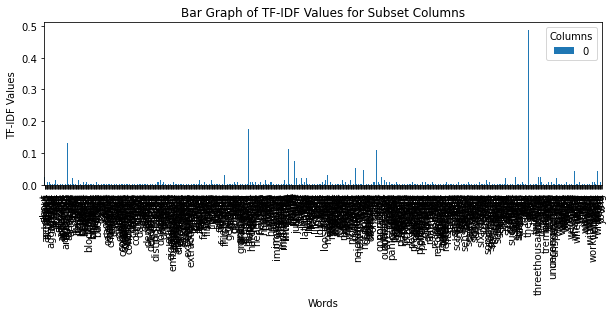

In [197]:
Matrix_ch1 = formulate.fit_transform([chapter1])
feature_names = formulate.get_feature_names_out()
df_ch1 = pd.DataFrame(Matrix_ch1.toarray(), columns=feature_names).transpose()
df_ch1

subset_columns = df_ch1.columns[:10]  # Choosing the first 10 columns for example

# Selecting the subset of data for plotting
subset_data = df_ch1[subset_columns]

# Plotting a bar graph for each column in the subset
subset_data.plot(kind='bar', figsize=(10, 3))
plt.xlabel('Words')
plt.ylabel('TF-IDF Values')
plt.title('Bar Graph of TF-IDF Values for Subset Columns')
plt.legend(title='Columns')
plt.show()

In [198]:
Matrix_ch2 = formulate.fit_transform([chapter2])
feature_names = formulate.get_feature_names_out()
df_ch2 = pd.DataFrame(Matrix_ch2.toarray(), columns=feature_names).transpose()
df_ch2

,0
about,0.030700
abundance,0.010233
adolescent,0.010233
afraid,0.010233
after,0.030700
...,...
yogi,0.020467
you,0.143268
young,0.030700
your,0.020467


In [199]:
Matrix_ch3 = formulate.fit_transform([chapter3])
feature_names = formulate.get_feature_names_out()
df_ch3 = pd.DataFrame(Matrix_ch3.toarray(), columns=feature_names).transpose()
df_ch3

,0
able,0.002862
about,0.022896
above,0.002862
abrupt,0.002862
absorbed,0.002862
...,...
your,0.020034
youth,0.002862
youthful,0.002862
youthfulness,0.002862


In [200]:
Matrix_ch4 = formulate.fit_transform([chapter4])
feature_names = formulate.get_feature_names_out()
df_ch4 = pd.DataFrame(Matrix_ch4.toarray(), columns=feature_names).transpose()
df_ch4

,0
about,0.021569
aching,0.010785
activity,0.010785
adorning,0.010785
adults,0.010785
...,...
years,0.010785
yogi,0.032354
youth,0.010785
youthful,0.010785


In [201]:
Matrix_ch5 = formulate.fit_transform([chapter6])
feature_names = formulate.get_feature_names_out()
df_ch5 = pd.DataFrame(Matrix_ch5.toarray(), columns=feature_names).transpose()
df_ch5

,0
715,0.004002
about,0.036022
abundance,0.004002
accustomed,0.004002
across,0.004002
...,...
you,0.316190
younger,0.004002
your,0.124074
yourself,0.012007


In [202]:
Matrix_ch6 = formulate.fit_transform([chapter6])
feature_names = formulate.get_feature_names_out()
df_ch6 = pd.DataFrame(Matrix_ch6.toarray(), columns=feature_names).transpose()
df_ch6

,0
715,0.004002
about,0.036022
abundance,0.004002
accustomed,0.004002
across,0.004002
...,...
you,0.316190
younger,0.004002
your,0.124074
yourself,0.012007


In [203]:
Matrix_ch7 = formulate.fit_transform([chapter7])
feature_names = formulate.get_feature_names_out()
df_ch7 = pd.DataFrame(Matrix_ch7.toarray(), columns=feature_names).transpose()
df_ch7

,0
1100th,0.001163
400,0.001163
abilities,0.001163
ability,0.003488
able,0.006977
...,...
young,0.004651
younger,0.002326
your,0.198832
yourself,0.013953


In [204]:
Matrix_ch8 = formulate.fit_transform([chapter8])
feature_names = formulate.get_feature_names_out()
df_ch8 = pd.DataFrame(Matrix_ch8.toarray(), columns=feature_names).transpose()
df_ch8

,0
21,0.001797
400,0.001797
59999,0.001797
60000,0.001797
abilities,0.003593
...,...
yours,0.001797
yourself,0.014373
youthful,0.001797
zenlike,0.001797


In [205]:
Matrix_ch9 = formulate.fit_transform([chapter9])
feature_names = formulate.get_feature_names_out()
df_ch9 = pd.DataFrame(Matrix_ch9.toarray(), columns=feature_names).transpose()
df_ch9

,0
10,0.000744
168,0.000744
215pound,0.000744
500,0.000744
530,0.000744
...,...
yourself,0.023819
youthful,0.001489
youve,0.001489
zen,0.000744


In [206]:
Matrix_ch10 = formulate.fit_transform([chapter10])
feature_names = formulate.get_feature_names_out()
df_ch10 = pd.DataFrame(Matrix_ch10.toarray(), columns=feature_names).transpose()
df_ch10

,0
10,0.002438
600,0.002438
ability,0.002438
able,0.002438
about,0.017065
...,...
younger,0.002438
your,0.175522
youre,0.004876
yourself,0.019502


In [207]:
Matrix_ch11 = formulate.fit_transform([chapter11])
feature_names = formulate.get_feature_names_out()
df_ch11 = pd.DataFrame(Matrix_ch11.toarray(), columns=feature_names).transpose()
df_ch11

,0
11,0.002631
20,0.002631
630,0.002631
abode,0.002631
about,0.052629
...,...
yourself,0.007894
youth,0.005263
youthful,0.002631
zest,0.002631


In [208]:
Matrix_ch12 = formulate.fit_transform([chapter12])
feature_names = formulate.get_feature_names_out()
df_ch12 = pd.DataFrame(Matrix_ch12.toarray(), columns=feature_names).transpose()
df_ch12

,0
12,0.005298
ability,0.005298
about,0.031786
abundance,0.005298
accustomed,0.005298
...,...
youre,0.005298
yourself,0.021191
yourselves,0.005298
youthful,0.005298


In [209]:
Matrix_ch13 = formulate.fit_transform([chapter13])
feature_names = formulate.get_feature_names_out()
df_ch13 = pd.DataFrame(Matrix_ch13.toarray(), columns=feature_names).transpose()
df_ch13

,0
13,0.002188
ability,0.004376
about,0.015314
above,0.004376
absolutely,0.006563
...,...
your,0.150955
youre,0.002188
yours,0.002188
yourself,0.010939


In [210]:
from functools import reduce

In [211]:
dfs = {"ch1":df_ch1,"ch2":df_ch2,"ch3":df_ch3,"ch4":df_ch4,"ch5":df_ch5,"ch6": df_ch6,"ch7":df_ch7,"ch8":df_ch8,"ch9":df_ch9,"ch10":df_ch10,"ch11":df_ch11,"ch12":df_ch12,"ch13":df_ch13}

In [212]:
def outer_join(df1, df2, left_name, right_name):
    return pd.merge(df1, df2, left_index=True, right_index=True, how="outer", suffixes=("_" + left_name, "_" + right_name))

In [213]:
for df in dfs.values():
    df.index = df.index.astype(str)

In [144]:
result_df = reduce(lambda df1, df2: outer_join(df1, df2, left_name=df1, right_name=df2), dfs.values())

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U1'), dtype('float64')) -> None

In [214]:
tdf=pd.merge(df_ch1, df_ch2, left_index=True, right_index=True, how="outer", suffixes=("df1", "df2"))
tdf2=pd.merge(tdf, df_ch3, left_index=True, right_index=True, how="outer", suffixes=("df1", "df3"))
tdf3=pd.merge(tdf2, df_ch4, left_index=True, right_index=True, how="outer", suffixes=("df1", "df4"))
tdf4=pd.merge(tdf3, df_ch5, left_index=True, right_index=True, how="outer", suffixes=("df1", "df5"))
tdf5=pd.merge(tdf4, df_ch6, left_index=True, right_index=True, how="outer", suffixes=("df1", "df6"))
tdf6=pd.merge(tdf5, df_ch7, left_index=True, right_index=True, how="outer", suffixes=("df1", "df7"))
tdf7=pd.merge(tdf6, df_ch8, left_index=True, right_index=True, how="outer", suffixes=("df1", "df8"))
tdf8=pd.merge(tdf7, df_ch9, left_index=True, right_index=True, how="outer", suffixes=("df1", "df9"))
tdf9=pd.merge(tdf8, df_ch10, left_index=True, right_index=True, how="outer", suffixes=("df1", "df10"))
tdf10=pd.merge(tdf9, df_ch11, left_index=True, right_index=True, how="outer", suffixes=("df1", "df11"))
tdf11=pd.merge(tdf10, df_ch12, left_index=True, right_index=True, how="outer", suffixes=("df1", "df12"))
tdf12=pd.merge(tdf11, df_ch13, left_index=True, right_index=True, how="outer", suffixes=("df1", "df13"))
tdf12.columns = ['Chapter1', 'Chapter2','Chapter3', 'Chapter4', 'Chapter5', 'Chapter6','Chapter7', 'Chapter8','Chapter9', 'Chapter10', 'Chapter11', 'Chapter12', 'Chapter13']
tdf12

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20236\3074031129.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0df1'} in the result is deprecated and will raise a MergeError in a future version.
  tdf3=pd.merge(tdf2, df_ch4, left_index=True, right_index=True, how="outer", suffixes=("df1", "df4"))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20236\3074031129.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0df1'} in the result is deprecated and will raise a MergeError in a future version.
  tdf5=pd.merge(tdf4, df_ch6, left_index=True, right_index=True, how="outer", suffixes=("df1", "df6"))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20236\3074031129.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0df1'} in the result is deprecated and will raise a MergeError in a future version.
  tdf7=pd.merge(tdf6, df_ch8, left_index=True, right_index=True, how="outer", suffixes=("df1", "df8"))
C:\Users\LENOVO\AppData\Local\Temp\ip

,Chapter1,Chapter2,Chapter3,Chapter4,Chapter5,Chapter6,Chapter7,Chapter8,Chapter9,Chapter10,Chapter11,Chapter12,Chapter13
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000744,0.002438,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002631,NaN,NaN
1100th,NaN,NaN,NaN,NaN,NaN,NaN,0.001163,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005298,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002188
...,...,...,...,...,...,...,...,...,...,...,...,...,...
zenlike,NaN,NaN,NaN,0.010785,NaN,NaN,NaN,0.001797,NaN,NaN,NaN,NaN,NaN
zest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001797,NaN,NaN,0.002631,NaN,NaN
zone,NaN,NaN,NaN,NaN,NaN,NaN,0.001163,NaN,0.002233,NaN,NaN,NaN,NaN
zones,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005298,NaN


In [215]:
tdf12.fillna(0,inplace=True)

In [216]:
tdf12

,Chapter1,Chapter2,Chapter3,Chapter4,Chapter5,Chapter6,Chapter7,Chapter8,Chapter9,Chapter10,Chapter11,Chapter12,Chapter13
10,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000744,0.002438,0.000000,0.000000,0.000000
11,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.002631,0.000000,0.000000
1100th,0.0,0.0,0.0,0.000000,0.0,0.0,0.001163,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.005298,0.000000
13,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002188
...,...,...,...,...,...,...,...,...,...,...,...,...,...
zenlike,0.0,0.0,0.0,0.010785,0.0,0.0,0.000000,0.001797,0.000000,0.000000,0.000000,0.000000,0.000000
zest,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.001797,0.000000,0.000000,0.002631,0.000000,0.000000
zone,0.0,0.0,0.0,0.000000,0.0,0.0,0.001163,0.000000,0.002233,0.000000,0.000000,0.000000,0.000000
zones,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.005298,0.000000


In [217]:
from sklearn.metrics.pairwise import cosine_similarity

chapter_names = [f'Chapter{i}' for i in range(1, 13)]  # Assuming chapters are named Chapter1, Chapter2, ..., Chapter13

vector1 = tdf12['Chapter1'].values.reshape(1, -1)  # Vector for Chapter1

for chapter_name in chapter_names[1:]:  # Loop through Chapter2 to Chapter13
    vector = tdf12[chapter_name].values.reshape(1, -1)  # Vector for each chapter
    cosine_sim = cosine_similarity(vector1, vector)[0, 0]  # Compute cosine similarity
    print(f"Cosine Similarity between Chapter1 and {chapter_name}: {cosine_sim}")


Cosine Similarity between Chapter1 and Chapter2: 0.8902737021525748
Cosine Similarity between Chapter1 and Chapter3: 0.9259224603982921
Cosine Similarity between Chapter1 and Chapter4: 0.8230251421696828
Cosine Similarity between Chapter1 and Chapter5: 0.8182803158635803
Cosine Similarity between Chapter1 and Chapter6: 0.8182803158635803
Cosine Similarity between Chapter1 and Chapter7: 0.7605743209798823
Cosine Similarity between Chapter1 and Chapter8: 0.7459711238721436
Cosine Similarity between Chapter1 and Chapter9: 0.7514219085187335
Cosine Similarity between Chapter1 and Chapter10: 0.7123864651661431
Cosine Similarity between Chapter1 and Chapter11: 0.7335393530433337
Cosine Similarity between Chapter1 and Chapter12: 0.795014076615786


# Formulation of Similarity Matrix

In [218]:
similarity_matrix = cosine_similarity(tdf12.transpose())

In [219]:
similarity_df = pd.DataFrame(data=similarity_matrix, columns=tdf12.columns, index=tdf12.columns)

In [220]:
similarity_df

,Chapter1,Chapter2,Chapter3,Chapter4,Chapter5,Chapter6,Chapter7,Chapter8,Chapter9,Chapter10,Chapter11,Chapter12,Chapter13
Chapter1,1.000000,0.890274,0.925922,0.823025,0.818280,0.818280,0.760574,0.745971,0.751422,0.712386,0.733539,0.795014,0.843522
Chapter2,0.890274,1.000000,0.897758,0.750908,0.848000,0.848000,0.780004,0.767189,0.776831,0.752353,0.772427,0.797642,0.852208
Chapter3,0.925922,0.897758,1.000000,0.898975,0.898718,0.898718,0.856788,0.851392,0.848004,0.808554,0.827622,0.878521,0.919577
Chapter4,0.823025,0.750908,0.898975,1.000000,0.820203,0.820203,0.800078,0.806993,0.789429,0.741340,0.756529,0.826258,0.842562
Chapter5,0.818280,0.848000,0.898718,0.820203,1.000000,1.000000,0.948633,0.940738,0.950231,0.931662,0.926177,0.918237,0.954863
Chapter6,0.818280,0.848000,0.898718,0.820203,1.000000,1.000000,0.948633,0.940738,0.950231,0.931662,0.926177,0.918237,0.954863
Chapter7,0.760574,0.780004,0.856788,0.800078,0.948633,0.948633,1.000000,0.978548,0.983712,0.970641,0.959323,0.938084,0.953467
Chapter8,0.745971,0.767189,0.851392,0.806993,0.940738,0.940738,0.978548,1.000000,0.977880,0.957296,0.955744,0.938062,0.948062
Chapter9,0.751422,0.776831,0.848004,0.789429,0.950231,0.950231,0.983712,0.977880,1.000000,0.972941,0.957750,0.932959,0.953552
Chapter10,0.712386,0.752353,0.808554,0.741340,0.931662,0.931662,0.970641,0.957296,0.972941,1.000000,0.943694,0.913921,0.928065


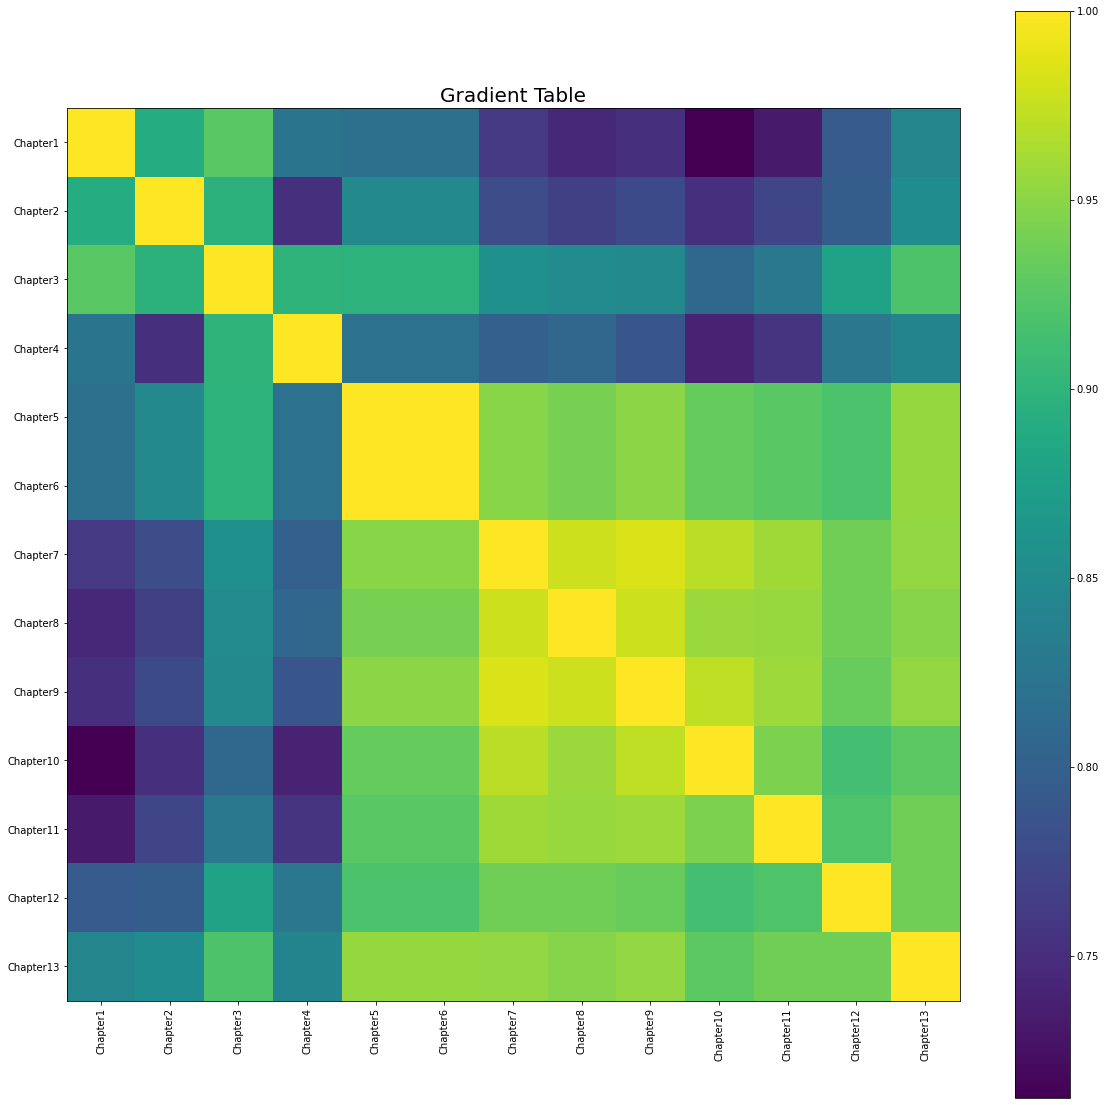

In [221]:
plt.figure(figsize=(20,20))
plt.imshow(similarity_df, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(tdf12.columns)), tdf12.columns, rotation=90)
plt.yticks(np.arange(len(tdf12.columns)), tdf12.columns)
plt.title('Gradient Table',fontdict={'size':20})
plt.show()